<a href="https://colab.research.google.com/github/nhamhung/CS3244-Machine-Learning/blob/main/CS3244_DL_LSTM_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Motivation:
- The nature of the dataset contains a lot of misspellings. As a result, the word vectors trained on the training set may not contain all the words present in the test set. This is because the mispelt words may not be present in the model's "dictionary". 
- One way to tackle this problem is by splitting the sentences into characters instead of words. This increases the chance of capturing the sentence's meaning since the same characters are much more likely to be present in both training and test set. One problem could be introduced, however, which is the explosion of dimensions. To tackle this, CNN can be utilised, since it usually deals with high dimensional dataset such as images as well.

# Deep Learning with CNN and LSTM

- Instead of word vectors, we will use character vectors.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
K

<module 'tensorflow.keras.backend' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/backend/__init__.py'>

In [ ]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU,Conv1D,MaxPooling1D
from keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import gc
from sklearn.model_selection import train_test_split
from keras.models import load_model

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/CS3244 Project/Wiki Toxic Classification/train.csv')
X_test = pd.read_csv('/content/drive/My Drive/CS3244 Project/Wiki Toxic Classification/test.csv')
X_submit = pd.read_csv('/content/drive/My Drive/CS3244 Project/Wiki Toxic Classification/sample_submission.csv', header = 0)

### Preprocess by tokenizing into characters

In [ ]:
# preprocess
def preprocess(max_features=20000, maxlen=500):
  labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
  
  y = X_train[labels].values
  train_sentence_list = X_train['comment_text']
  test_sentence_list = X_test['comment_text']

  tokenizer = Tokenizer(num_words=max_features, char_level=True)
  tokenizer.fit_on_texts(list(train_sentence_list))
  train_tokenized_list = tokenizer.texts_to_sequences(train_sentence_list)
  test_tokenized_list = tokenizer.texts_to_sequences(test_sentence_list)

  X_t = pad_sequences(train_tokenized_list, maxlen=maxlen)
  X_te = pad_sequences(test_tokenized_list, maxlen=maxlen)

  return tokenizer, X_t, X_te, train_tokenized_list, test_tokenized_list, y

In [ ]:
tokenizer, X_t, X_te, train_tokenized_list, test_tokenized_list, y = preprocess()

In [ ]:
tokenizer.word_index

{' ': 1,
 'e': 2,
 't': 3,
 'a': 4,
 'i': 5,
 'o': 6,
 'n': 7,
 's': 8,
 'r': 9,
 'h': 10,
 'l': 11,
 'd': 12,
 'u': 13,
 'c': 14,
 'm': 15,
 'p': 16,
 'y': 17,
 'g': 18,
 'f': 19,
 'w': 20,
 'b': 21,
 '.': 22,
 'k': 23,
 'v': 24,
 ',': 25,
 '\n': 26,
 '"': 27,
 "'": 28,
 'j': 29,
 '!': 30,
 '1': 31,
 '-': 32,
 '0': 33,
 ':': 34,
 'x': 35,
 ')': 36,
 '(': 37,
 '2': 38,
 '?': 39,
 '/': 40,
 'q': 41,
 'z': 42,
 '9': 43,
 '3': 44,
 '5': 45,
 '4': 46,
 '=': 47,
 '8': 48,
 '6': 49,
 '7': 50,
 ';': 51,
 '_': 52,
 '|': 53,
 ']': 54,
 '[': 55,
 '~': 56,
 '&': 57,
 '—': 58,
 '{': 59,
 '\xa0': 60,
 '#': 61,
 '}': 62,
 '•': 63,
 '%': 64,
 '*': 65,
 '’': 66,
 '+': 67,
 '–': 68,
 '“': 69,
 '”': 70,
 '>': 71,
 '@': 72,
 '·': 73,
 'é': 74,
 '$': 75,
 '^': 76,
 '\u200e': 77,
 '→': 78,
 '`': 79,
 '\\': 80,
 '´': 81,
 '<': 82,
 '‘': 83,
 'а': 84,
 'о': 85,
 'á': 86,
 'и': 87,
 '…': 88,
 'е': 89,
 'ü': 90,
 'ö': 91,
 'н': 92,
 'α': 93,
 'ا': 94,
 'í': 95,
 'р': 96,
 'с': 97,
 'ó': 98,
 'ı': 99,
 'т': 100

In [ ]:
X_t[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

### Why 500? We can study the distribution of char numbers across all comments

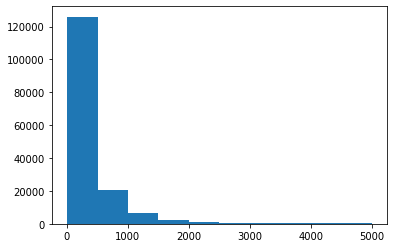

In [ ]:
total_chars_per_comment = [len(comment) for comment in train_tokenized_list]
plt.hist(total_chars_per_comment)
plt.show()

In [ ]:
def build_CNN_LSTM(maxlen, embed_size):
  input = Input(shape=(maxlen,)) # tf.keras will infer the shape of remaining layers
  embed_size = embed_size
  x = Embedding(len(tokenizer.word_index)+1, embed_size)(input) # we project all characters into a 300-dimensional vector space, output a (num_of_comments x 500 x 240) matrix 
  x = Conv1D(filters=100,kernel_size=4,padding='same', activation='relu')(x) # convolution layer. Output a (num_of_comments x 500 x 100) matrix
  x = MaxPooling1D(pool_size=4)(x) # max-pooling to reduce the dimension. Output a (num_of_comments x 125 x 100) matrix due to max pool -> reduce 500 by 4
  x = Bidirectional(LSTM(60, return_sequences=True,name='lstm_layer',dropout=0.2,recurrent_dropout=0.2))(x) # pass through Bi-directional LSTM layer with dropout
  x = GlobalMaxPool1D()(x) # Global max pooling <> max pooling. Output (num_of_comments x 120) 2D matrix
  x = Dense(50, activation="relu")(x)
  x = Dropout(0.2)(x)
  x = Dense(6, activation="sigmoid")(x)
  model = Model(inputs=input, outputs=x)
  model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                  metrics=['accuracy', tf.keras.metrics.AUC()])
  return model

In [ ]:
model = build_CNN_LSTM(500, 300)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 300)          634500    
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 100)          120100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 125, 100)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 125, 120)          77280     
_________________________________________________________________
global_max_pooling1d (Global (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 50)               

### Training

In [ ]:
batch_size = 32
epochs = 4

checkpoint_filepath = '/content/drive/My Drive/CS3244 Project/checkpoints/CNN_LSTM.ckpt'

callbacks_list = [EarlyStopping(monitor='val_loss', patience=3), ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True)]

hist = model.fit(X_t, y, batch_size=batch_size, epochs=epochs,validation_split=0.1,callbacks=callbacks_list)

Epoch 1/4
4488/4488 [==============================] - 1428s 318ms/step - loss: 0.0797 - accuracy: 0.9405 - auc: 0.9370 - val_loss: 0.0606 - val_accuracy: 0.9940 - val_auc: 0.9675
Epoch 2/4
4488/4488 [==============================] - 1396s 311ms/step - loss: 0.0590 - accuracy: 0.9939 - auc: 0.9668 - val_loss: 0.0573 - val_accuracy: 0.9940 - val_auc: 0.9745
Epoch 3/4
4488/4488 [==============================] - 1397s 311ms/step - loss: 0.0544 - accuracy: 0.9937 - auc: 0.9728 - val_loss: 0.0534 - val_accuracy: 0.9940 - val_auc: 0.9778
Epoch 4/4
4488/4488 [==============================] - 1391s 310ms/step - loss: 0.0514 - accuracy: 0.9936 - auc: 0.9766 - val_loss: 0.0519 - val_accuracy: 0.9934 - val_auc: 0.9757


In [ ]:
model.save("DL_CNN.h5")

In [ ]:
batch_size = 64
y_test = model.predict([X_te],batch_size=batch_size,verbose=1)

2394/2394 [==============================] - 105s 44ms/step


In [ ]:
y_test

array([[9.99846399e-01, 4.16981757e-01, 9.93040383e-01, 3.18979919e-02,
        9.53986943e-01, 1.48697227e-01],
       [6.40727580e-02, 1.07906562e-04, 5.10305166e-03, 9.59426165e-04,
        1.26673281e-02, 2.58064270e-03],
       [1.15576982e-02, 5.53059044e-06, 8.85128975e-04, 3.11783442e-05,
        1.36461854e-03, 2.33948231e-04],
       ...,
       [9.03666019e-04, 3.77583191e-08, 3.46343295e-05, 3.97346696e-07,
        6.54749165e-05, 9.65503659e-06],
       [9.14427638e-03, 8.52254743e-06, 1.01488829e-03, 4.04562015e-05,
        1.50597095e-03, 5.72979450e-04],
       [9.16933179e-01, 1.09701455e-02, 7.09288538e-01, 2.08985806e-03,
        4.35632020e-01, 1.35909915e-02]], dtype=float32)

In [ ]:
X_submit

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


In [ ]:
sample_submission = X_submit
sample_submission[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]] = y_test
sample_submission.to_csv('/content/drive/My Drive/CS3244 Project/CNN_LSTM_super_final.csv', index=False)

In [ ]:
sample_submission = pd.merge(sample_submission, X_test, how='inner', on='id')
sample_submission

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,00001cee341fdb12,0.999846,4.169818e-01,0.993040,3.189799e-02,0.953987,0.148697,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,0.064073,1.079066e-04,0.005103,9.594262e-04,0.012667,0.002581,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,0.011558,5.530590e-06,0.000885,3.117834e-05,0.001365,0.000234,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,0.000491,3.008347e-08,0.000015,3.509513e-07,0.000033,0.000006,":If you have a look back at the source, the in..."
4,00017695ad8997eb,0.025475,2.137073e-05,0.002127,1.153491e-04,0.003521,0.000644,I don't anonymously edit articles at all.
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.253477,9.506047e-04,0.079495,1.377165e-03,0.082178,0.006921,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,0.026815,1.422289e-05,0.001711,1.827180e-04,0.004494,0.001039,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,0.000904,3.775832e-08,0.000035,3.973467e-07,0.000065,0.000010,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,0.009144,8.522547e-06,0.001015,4.045620e-05,0.001506,0.000573,""" \n\n == """"One of the founding nations of the..."


### Convolutional Neural Network

- Output of the embedding layer will be fed into a convolutional layer using window of size 4 and 100 filters. To extract features and preserve information, we will use padding as well.
- Distinction between MaxPooling1D and GlobalMaxPool1D: MaxPooling1D down-samples only the 2nd dimension (500 - num of characters). Matrix is still 3D (comments x 500 x 100). GlobalMaxPool1D downsamples several dimensions to a single dimension -> output (num_of_comments x 120) 2D matrix.